In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Data Load

In [9]:
data = pd.read_csv('data\Social_Network_Ads.csv').values
data

array([[   19, 19000,     0],
       [   35, 20000,     0],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     1],
       [   36, 33000,     0],
       [   49, 36000,     1]], dtype=int64)

In [10]:
data.shape

(400, 3)

### 2. X(feature)와 y(label) 분리

In [13]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape, y.shape)

(400, 2) (400,)


### 3. train / test data 분리

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(280, 2) (280,)
(120, 2) (120,)


### 4. Scaling

- KNN은 Scaling이 필요할까?
    * Scaling 필요
    * Classification 또는 regression에서 **거리 개념**이 반영되는 경우, **scaling이 필요**함

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

print(X_train.mean(axis=0))
# 각 column의 평균: 약 37세, 약 $69,000
# Age는 37에 가까울 수록, Salary는 69000에 가까울 수록 0에 가까움

Xsc_train = sc.transform(X_train)
print(X_train)
print(Xsc_train)

[3.71000000e+01 6.90571429e+04]
[[    27  31000]
 [    35  71000]
 [    49  28000]
 [    35  91000]
 [    37  75000]
 [    32 117000]
 [    36  75000]
 [    20  86000]
 [    38  50000]
 [    49  36000]
 [    40  65000]
 [    37  77000]
 [    60  46000]
 [    48 138000]
 [    40  71000]
 [    36  63000]
 [    26  81000]
 [    33  31000]
 [    41  51000]
 [    46  74000]
 [    18  82000]
 [    37  33000]
 [    35  53000]
 [    28  59000]
 [    37  71000]
 [    18  44000]
 [    38  61000]
 [    35  65000]
 [    31  66000]
 [    47  25000]
 [    42 104000]
 [    19  19000]
 [    21  72000]
 [    28  32000]
 [    52 150000]
 [    53 104000]
 [    25  80000]
 [    26  72000]
 [    26  15000]
 [    40 142000]
 [    35  38000]
 [    57 122000]
 [    41  87000]
 [    24  89000]
 [    37  52000]
 [    35 108000]
 [    32 100000]
 [    35 147000]
 [    19  26000]
 [    46  82000]
 [    47 105000]
 [    45  45000]
 [    38  51000]
 [    37  93000]
 [    29  43000]
 [    41  30000]
 [    40  60000]

- training 과정에서 scaling된 data를 사용
- test 과정에서 scaling된 data를 적용

### 5. KNN training

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# n_neighbors: k (class를 확인할 이웃 data의 수)
# weights: uniform -> 동일한 가중치, distance -> 가까운 이웃에 더 큰 가중치 반영
# p=2, metric='minkowskl' -> Encildean distance를 사용한다는 의미

In [23]:
knn.fit(Xsc_train, y_train)
# sklearn에서 model의 학습 함수는 모두
# -> fit(X_train, y_train) <-
# fit 완료 후, Classification/Regression model에 학습 결과가 저장됨

KNeighborsClassifier()

### 6. X_test data에 대한 예측

In [31]:
Xsc_test = sc.transform(X_test)
# X_test를 적용할 model은 X를 scaling한 값을 기반으로 학습했으므로, X_test로 scaling함

pred = knn.predict(Xsc_test)
print(pred)

[0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 0 1 0 0 0 1]


### 7. test 결과 확인하기 (accuracy, 정확도)
- 정확히 예측한 data의 수 / 전체 데이터의 수
    * 1: model이 예측한 결과 pred와 X_test에 대응되는 y_test를 비교함
    * 2: pred와 y_test가 동일한 데이터의 수 확인
    * 3: 2번 결과에 test 데이터 수를 나누어 accuracy 계산
- sklearn.metrics의 accuracy_score 사용

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.875

### 8. train data와 test data의 accuracy 확인하기
1. train data(Xsc_train)에 대한 예측값 train_pred
2. test data(Xsc_test)에 대한 예측값 test_pred
3. 각각에 대한 accuracy를 구하여 비교

In [35]:
train_pred = knn.predict(Xsc_train)
test_pred = knn.predict(Xsc_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f'Train Accuracy: {train_acc*100}%')
print(f'Test Accuracy:  {test_acc*100}%')

Train Accuracy: 93.57142857142857%
Test Accuracy:  87.5%


### 9. 결과 시각화
- y값이 0인 X_test data와 1인 X_test data 분리하기
- ndarray[조건식]: 조건식이 참(True와 False로 구성된 ndarray)인 ndarray의 행을 반환

In [39]:
# label값(실제 값)이 0인 데이터와 1인 데이터 분리
X0_test = X_test[y_test == 0]
X1_test = X_test[y_test == 1]
print(X0_test.shape, X1_test.shape)

(72, 2) (48, 2)


In [40]:
# prediction(예측 값)이 0인 데이터와 1인 데이터 분리
X0_test_pred = X_test[test_pred == 0]
X1_test_pred = X_test[test_pred == 1]
print(X0_test_pred.shape, X1_test_pred.shape)

(65, 2) (55, 2)


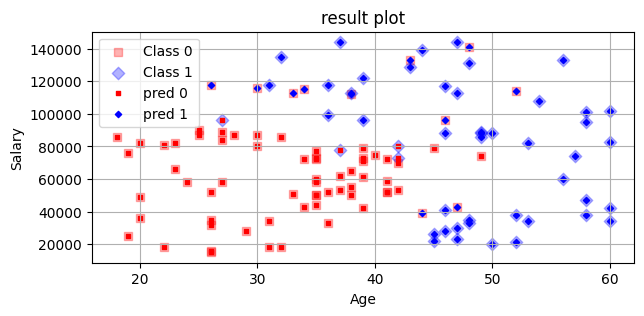

In [64]:
# 가로축이 Age, 세로축이 Salary인 scatter plot
plt.figure(figsize=(7,3))
plt.title('result plot')
plt.scatter(X0_test[:, 0], X0_test[:, 1], color='red', marker='s', s=40, alpha=0.3, label='Class 0')
plt.scatter(X1_test[:, 0], X1_test[:, 1], color='blue', marker='D', s=40, alpha=0.3, label='Class 1')
plt.scatter(X0_test_pred[:, 0], X0_test_pred[:, 1], color='red', marker='s', s=10,label='pred 0')
plt.scatter(X1_test_pred[:, 0], X1_test_pred[:, 1], color='blue', marker='D', s=10, label='pred 1')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.show()